In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
indices = np.where(y_train == 4)[0]
sample_index = indices[0]
sample_image = x_train[sample_index]
sample_image=sample_image/255.0
sample_image=sample_image.reshape( 1, 28, 28)

In [3]:
sample_image.shape

(1, 28, 28)

In [4]:
def conv_iterate_regions(image):
        h, w = image.shape
        for i in range(h - filter_size + 1):
            for j in range(w - filter_size + 1):
                region = image[i:(i + filter_size), j:(j + filter_size)]
                yield i, j, region

In [5]:
def pool_iterate_regions(image):
        h, w = image.shape
        new_h, new_w = h // 2, w // 2
        for i in range(new_h):
            for j in range(new_w):
                region = image[i*2:i*2+2, j*2:j*2+2]
                yield i, j, region

In [6]:
filter_size = 3
for i,j,region in conv_iterate_regions(sample_image[0]):
    print("i",i)
    print("j",j)
    print("region\n",region)

i 0
j 0
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 1
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 2
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 3
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 4
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 5
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 6
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 7
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 8
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 9
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 10
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 11
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 12
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 13
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 14
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 15
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 16
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 17
region
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
i 0
j 18
region
 [[0. 0. 0.]
 [0. 0. 0

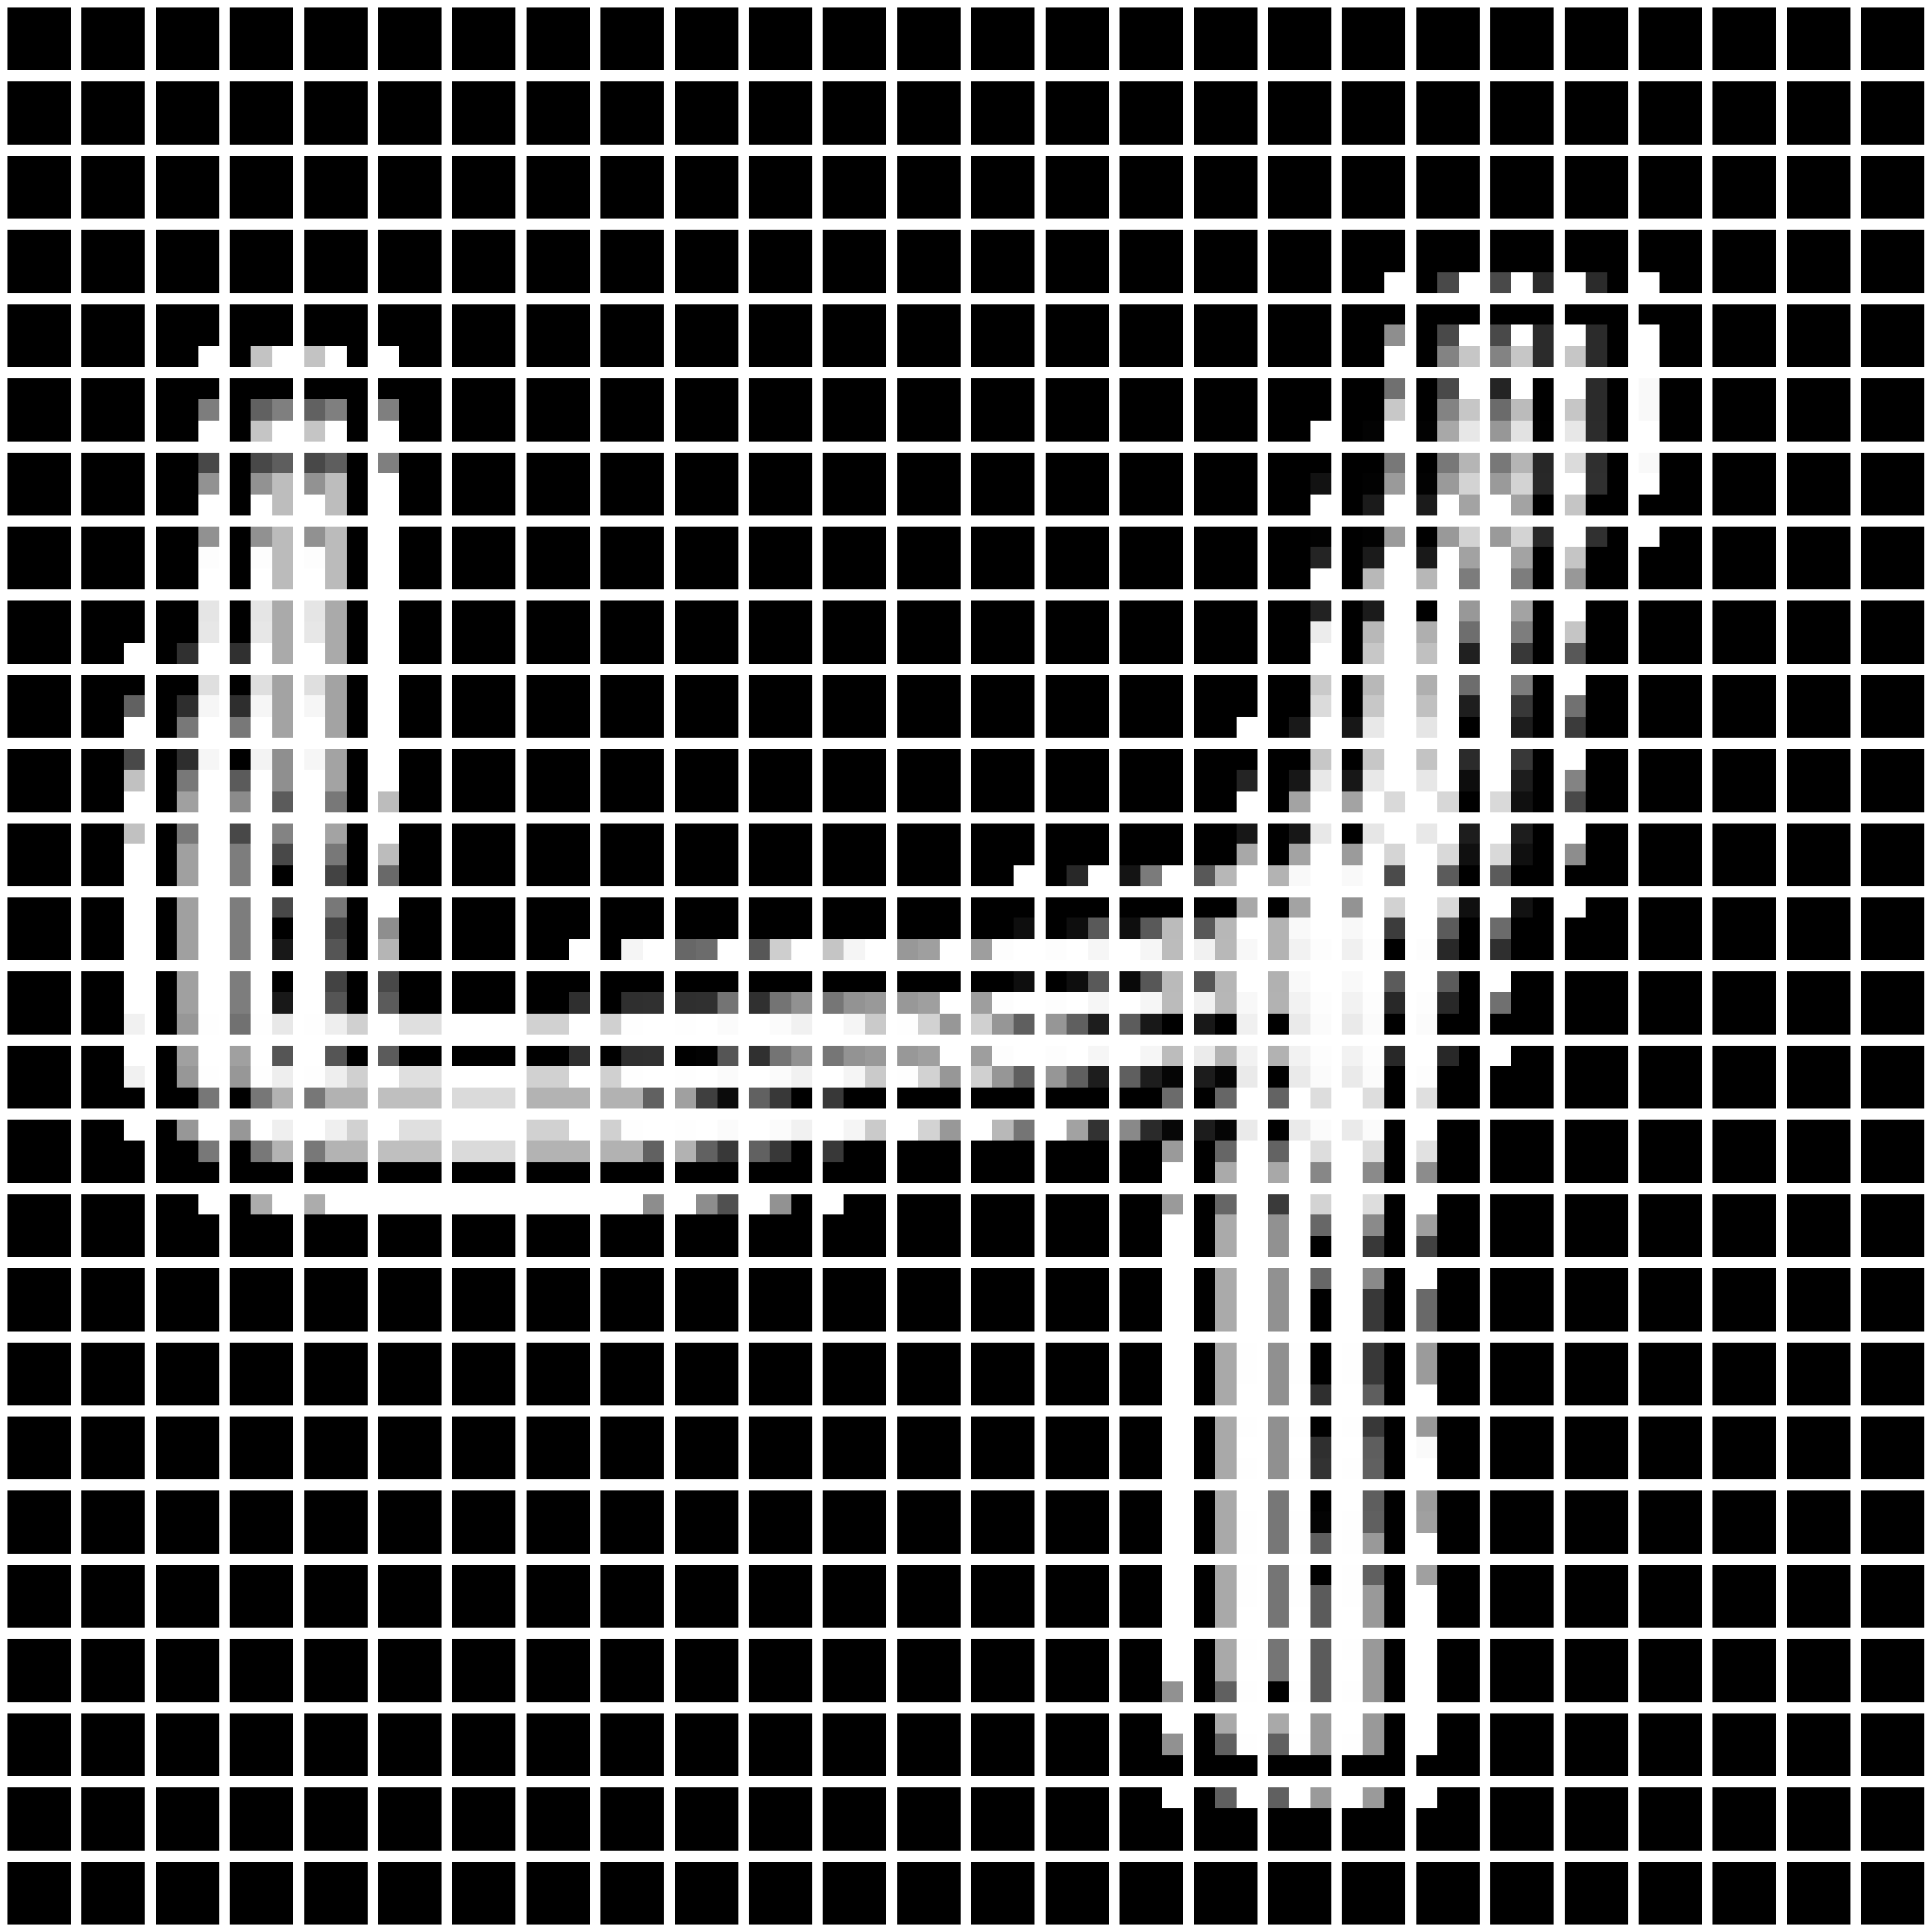

In [7]:
import matplotlib.pyplot as plt
regions = list(conv_iterate_regions(sample_image[0]))
num_regions = len(regions)

cols = 26
rows = (num_regions + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols, rows))
axs = axs.flatten()

for k, (i, j, region) in enumerate(regions):
    axs[k].imshow(region, cmap='gray')
    axs[k].axis('off')
    
for ax in axs[len(regions):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

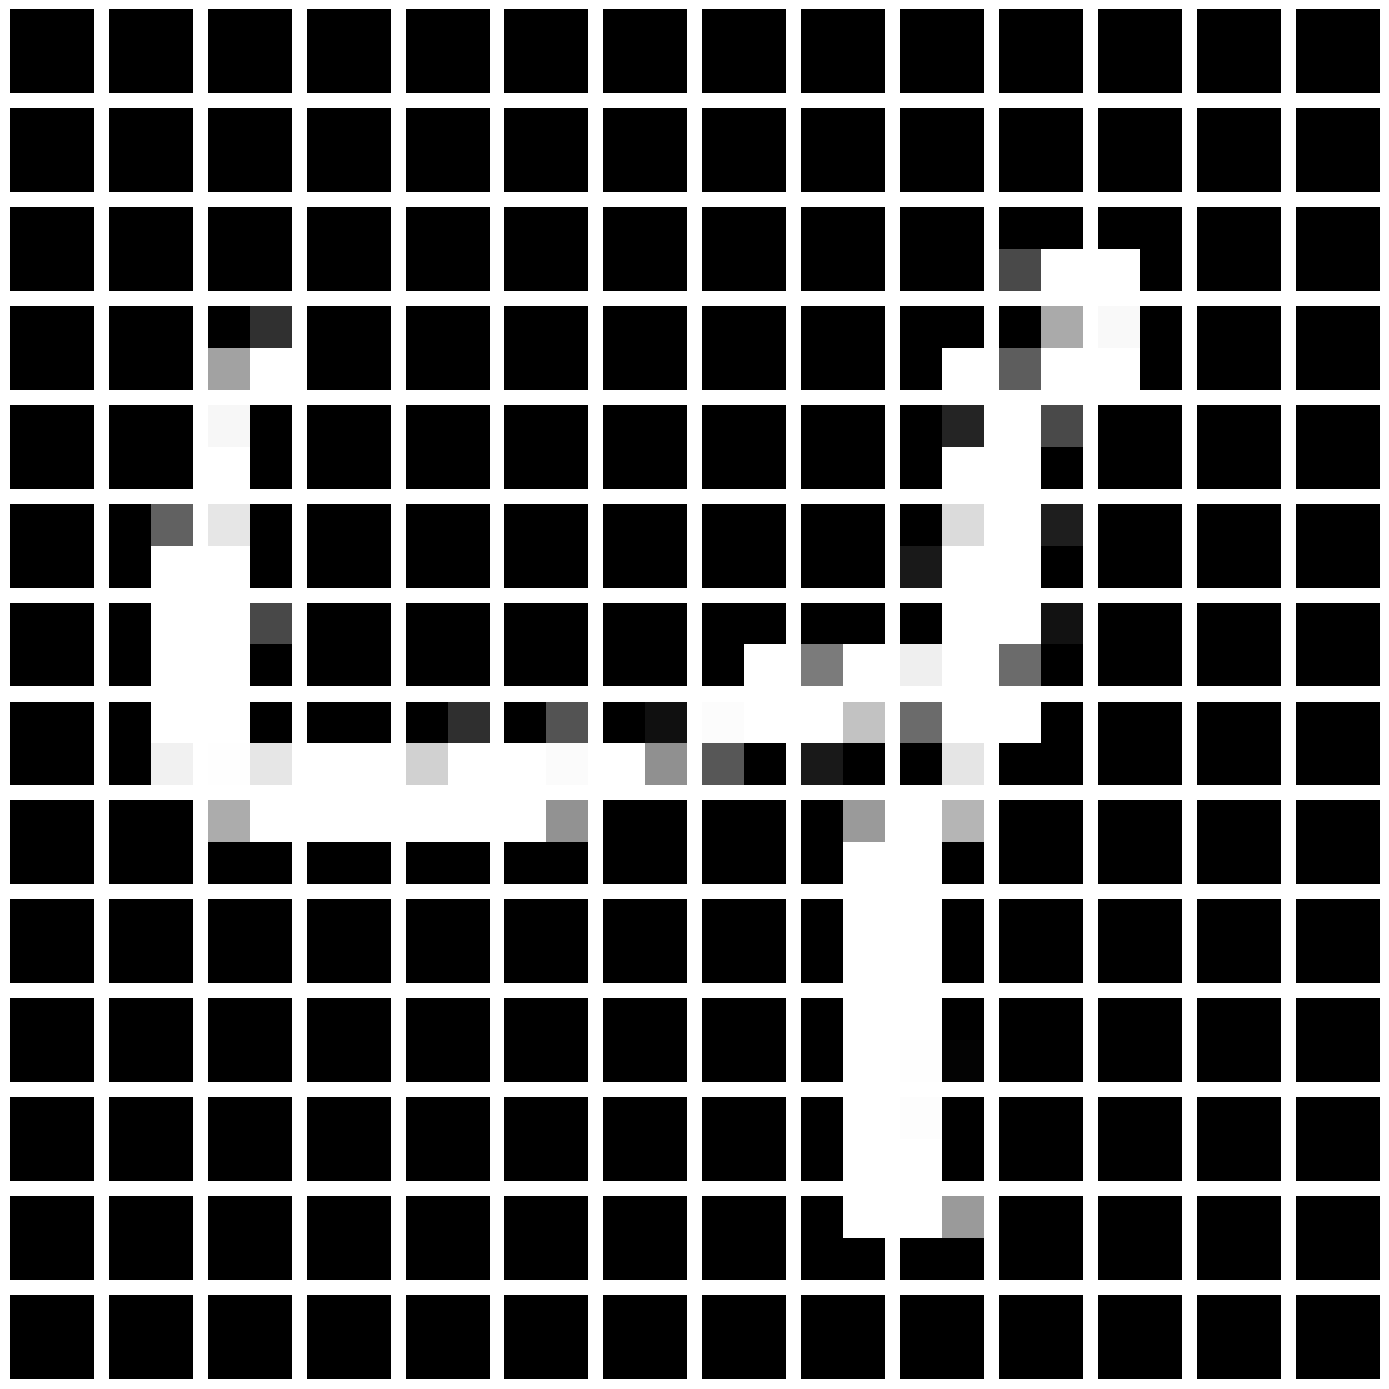

In [9]:
pool_reg_list=list(pool_iterate_regions(sample_image[0]))
num_pool_reg = len(pool_reg_list)

cols = 28//2
rows = (num_pool_reg + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols, rows))
axs = axs.flatten()

for k, (i, j, region) in enumerate(pool_reg_list):
    axs[k].imshow(region, cmap='gray')
    axs[k].axis('off')
    
for ax in axs[len(pool_reg_list):]:
    ax.axis('off')

plt.tight_layout()
plt.show()